<a href="https://colab.research.google.com/github/sabre-code/flower_classification/blob/main/flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
from skimage.transform import resize

In [ ]:
folders = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
x = [] # feature data set (images)
y = [] # Target data set (label)

**Code to check GPU**

In [ ]:
#!nvidia-smi -L

In [ ]:
for folder in folders:
  path = '/content/drive/My Drive/Colab Notebooks/flower_classification/flowers_cleaned/'+folder+'/*.jpg'
  files = glob.glob(path)

  for myFile in files:
    image = cv2.imread(myFile)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = resize(image,(32,32,3))
    x.append(image)
    y.append(folder)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

'dandelion'

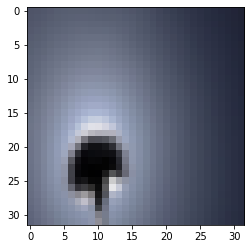

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[456])
y_train[456]

In [ ]:
#Convert all the labels to numeric values
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [ ]:
#Convert the labels into a set of 5 numbers to input into the neural network

from tensorflow.keras.utils import to_categorical

y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

In [ ]:
y_train_one

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
#Print the new label for first image
print('New label is :',y_train_one[1])

New label is : [0. 0. 0. 0. 1.]


In [ ]:
#Normalizing the pixels in the image to be values between 0 and 1.

In [ ]:
import numpy as np
x_train = np.array(x_train) /255
x_test = np.array(x_test) / 255

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
model = tf.keras.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,  activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one, batch_size = 50, epochs = 250, validation_split = 0.3)

Epoch 1/250
48/48 [==============================] - 6s 112ms/step - loss: 1.6013 - accuracy: 0.2327 - val_loss: 1.6018 - val_accuracy: 0.2448
Epoch 2/250
48/48 [==============================] - 5s 106ms/step - loss: 1.5979 - accuracy: 0.2386 - val_loss: 1.6035 - val_accuracy: 0.2448
Epoch 3/250
48/48 [==============================] - 5s 105ms/step - loss: 1.5979 - accuracy: 0.2386 - val_loss: 1.6020 - val_accuracy: 0.2448
Epoch 4/250
48/48 [==============================] - 5s 106ms/step - loss: 1.5973 - accuracy: 0.2323 - val_loss: 1.6054 - val_accuracy: 0.2203
Epoch 5/250
48/48 [==============================] - 5s 104ms/step - loss: 1.5964 - accuracy: 0.2310 - val_loss: 1.6007 - val_accuracy: 0.2448
Epoch 6/250
48/48 [==============================] - 5s 106ms/step - loss: 1.5927 - accuracy: 0.2433 - val_loss: 1.5922 - val_accuracy: 0.2448
Epoch 7/250
48/48 [==============================] - 5s 106ms/step - loss: 1.5716 - accuracy: 0.2559 - val_loss: 1.5423 - val_accuracy: 0.2409

In [ ]:
model.evaluate(x_test,y_test_one)

27/27 [==============================] - 0s 17ms/step - loss: 1.5809 - accuracy: 0.5448


[1.580910563468933, 0.5448113083839417]

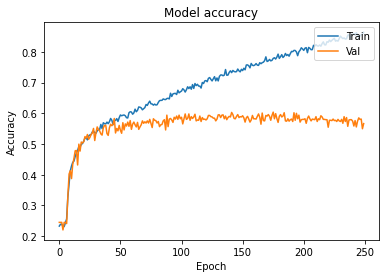

In [ ]:
#visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

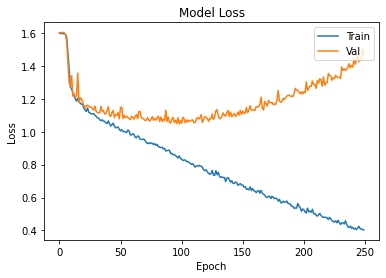

In [ ]:
#Visualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()